<a href="https://colab.research.google.com/github/nakib103/pancancer_classification/blob/master/explore_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!nvidia-smi

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



In [ ]:
# import packages
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# import drive and load data
from google.colab import drive
drive.mount('/content/drive')

data = pd.read_pickle("/content/drive/My Drive/data/data_df.pkl")
label = pd.read_pickle("/content/drive/My Drive/data/label_df.pkl")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
# print the gene names
for no, col in enumerate(data.columns):
  print(no, col)

Streaming output truncated to the last 5000 lines.
15532 SC65|10609
15533 SCAF1|58506
15534 SCAI|286205
15535 SCAMP1|9522
15536 SCAMP2|10066
15537 SCAMP3|10067
15538 SCAMP4|113178
15539 SCAMP5|192683
15540 SCAND1|51282
15541 SCAND2|54581
15542 SCAND3|114821
15543 SCAPER|49855
15544 SCAP|22937
15545 SCARA3|51435
15546 SCARA5|286133
15547 SCARB1|949
15548 SCARB2|950
15549 SCARF1|8578
15550 SCARF2|91179
15551 SCARNA10|692148
15552 SCARNA11|677780
15553 SCARNA12|677777
15554 SCARNA14|692149
15555 SCARNA15|677778
15556 SCARNA16|677781
15557 SCARNA17|677769
15558 SCARNA18|677765
15559 SCARNA1|677774
15560 SCARNA20|677681
15561 SCARNA21|677763
15562 SCARNA22|677770
15563 SCARNA23|677773
15564 SCARNA27|100124533
15565 SCARNA2|677766
15566 SCARNA3|677679
15567 SCARNA4|677771
15568 SCARNA5|677775
15569 SCARNA6|677772
15570 SCARNA7|677767
15571 SCARNA8|677776
15572 SCARNA9L|100158262
15573 SCARNA9|619383
15574 SCCPDH|51097
15575 SCD5|79966
15576 SCD|6319
15577 SCEL|8796
15578 SCFD1|23256
15579 SC

In [ ]:
data.head()

,?|100130426,?|100133144,?|100134869,?|10357,?|10431,?|136542,?|155060,?|26823,?|280660,?|317712,?|340602,?|388795,?|390284,?|391343,?|391714,?|404770,?|441362,?|442388,?|553137,?|57714,?|645851,?|652919,?|653553,?|728045,?|728603,?|728788,?|729884,?|8225,?|90288,A1BG|1,A1CF|29974,A2BP1|54715,A2LD1|87769,A2ML1|144568,A2M|2,A4GALT|53947,A4GNT|51146,AAA1|404744,AAAS|8086,AACSL|729522,...,ZRANB1|54764,ZRANB2|9406,ZRANB3|84083,ZRSR2|8233,ZSCAN10|84891,ZSCAN12P1|221584,ZSCAN12|9753,ZSCAN16|80345,ZSCAN18|65982,ZSCAN1|284312,ZSCAN20|7579,ZSCAN21|7589,ZSCAN22|342945,ZSCAN23|222696,ZSCAN29|146050,ZSCAN2|54993,ZSCAN4|201516,ZSCAN5A|79149,ZSCAN5B|342933,ZSWIM1|90204,ZSWIM2|151112,ZSWIM3|140831,ZSWIM4|65249,ZSWIM5|57643,ZSWIM6|57688,ZSWIM7|125150,ZUFSP|221302,ZW10|9183,ZWILCH|55055,ZWINT|11130,ZXDA|7789,ZXDB|158586,ZXDC|79364,ZYG11A|440590,ZYG11B|79699,ZYX|7791,ZZEF1|23140,ZZZ3|26009,psiTPTE22|387590,tAKR|389932
TCGA-OR-A5J1-01A-11R-A29S-07,0.0,3.2661,3.9385,149.1350,2034.10,0.0,274.255,1.4409,0.0,0.0,17.7714,0.0000,11.5274,0.0,0.0000,0.000,0.0,0.0,0.0,282.4210,1.4409,0.0000,1439.960,0.0,0.0,0.0000,0.0000,1147.450,6.7243,16.3305,0.0000,17.2911,182.3920,54.7550,10373.70,190.6820,0.0000,0.0,2225.26,0.0000,...,2180.120,1636.360,29.7791,256.004,0.0000,4.8751,206.052,49.4524,154.659,0.9606,13.4486,327.623,36.9837,3.3622,373.679,107.1090,0.4803,20.6532,0.0000,370.797,0.0,49.9520,152.738,280.980,135.447,722.747,148.4150,253.602,183.9580,146.9740,20.6532,351.585,1050.910,0.4803,648.415,1841.020,1157.540,596.062,715.658,0.9606
TCGA-OR-A5J2-01A-11R-A29S-07,0.0,2.6815,8.9948,81.0777,1304.93,0.0,199.302,0.0000,0.0,0.0,0.4026,0.4026,5.2342,0.0,0.4026,0.000,0.0,0.0,0.0,527.8480,2.4158,0.0000,195.678,0.0,0.0,0.4026,0.0000,467.454,16.9105,9.5987,0.0000,5.6368,239.1580,0.0000,9844.91,198.8990,0.0000,0.0,1509.46,0.4026,...,2553.480,788.318,84.1498,104.684,0.4026,8.9988,218.226,27.3467,2016.780,12.0789,70.4603,193.633,114.3470,39.4578,306.804,92.2024,0.8053,38.6525,1.2079,435.646,0.0,117.1650,502.483,868.071,175.950,240.560,106.2940,270.165,264.1250,438.4640,57.1735,279.023,2979.870,31.4052,1166.020,3059.990,1895.990,801.637,581.801,0.4026
TCGA-OR-A5J3-01A-11R-A29S-07,0.0,1.7301,6.5650,86.4879,1054.66,0.0,348.393,0.5925,0.0,0.0,0.5925,0.5925,7.7026,0.0,0.0000,1.185,0.0,0.0,0.0,162.3460,10.0726,0.0000,770.849,0.0,0.0,0.0000,0.5925,553.399,12.4426,20.7377,0.5925,8.8876,138.8830,1.7775,7201.84,75.2481,2.3700,0.0,1259.67,0.0000,...,864.465,673.619,79.9881,193.749,1.1850,8.5558,194.342,2.9625,2597.540,20.7377,55.6955,284.853,117.3160,8.8876,239.372,170.6410,0.0000,110.7980,2.3700,284.402,0.0,67.5455,591.320,647.015,242.927,229.927,140.4240,297.437,90.6532,190.1940,39.6978,495.334,914.827,0.5925,806.399,2655.610,1482.450,437.269,126.796,0.0000
TCGA-OR-A5J5-01A-11R-A29S-07,0.0,0.0000,1.5492,53.9117,2350.89,0.0,439.194,0.7746,0.0,0.0,0.7746,0.7746,6.1967,0.0,0.0000,0.000,0.0,0.0,0.0,52.6723,3.0984,37.2579,1218.440,0.0,0.0,9.2951,0.0000,1061.190,22.4632,1696.6600,1.5492,6.1967,63.9349,49.5740,2939.04,374.9030,0.7746,0.0,2993.80,3.0984,...,1803.250,1076.680,13.9427,472.502,5.4222,7.1418,154.144,16.2665,3464.760,83.6561,57.3199,452.363,240.1240,18.5902,546.088,151.8200,0.0000,155.6930,2.3238,358.637,0.0,118.5130,333.075,566.228,525.949,230.496,84.4307,146.398,260.2630,840.4340,17.8156,206.042,890.782,11.6189,553.834,2367.930,1140.200,512.781,855.151,0.0000
TCGA-OR-A5J6-01A-31R-A29S-07,0.0,0.0000,4.4709,66.9063,1257.99,0.0,149.215,0.0000,0.0,0.0,0.0000,2.7943,10.6183,0.0,0.0000,0.000,0.0,0.0,0.0,143.0670,1.6766,0.0000,413.554,0.0,0.0,1.1177,0.0000,597.418,2.7943,600.1620,0.0000,4.4709,237.3520,1.1177,9586.96,1556.4200,0.5589,0.0,1186.45,0.0000,...,1110.450,998.615,81.0342,282.223,0.0000,191.0900,209.012,66.4984,1878.320,7.8240,32.9725,307.578,116.2420,9.5006,225.219,201.1880,0.0000,32.4137,0.5589,379.464,0.0,156.4800,164.863,636.538,204.542,585.240,139.7140,384.493,64.2685,63.1508,12.8537,117.919,894.730,7.8240,795.812,708.071,796.371,475.587,288.370,0.0000


In [ ]:
label.head()

,0
TCGA-OR-A5J1-01A-11R-A29S-07,ACC
TCGA-OR-A5J2-01A-11R-A29S-07,ACC
TCGA-OR-A5J3-01A-11R-A29S-07,ACC
TCGA-OR-A5J5-01A-11R-A29S-07,ACC
TCGA-OR-A5J6-01A-31R-A29S-07,ACC


expression of different gene on cancer class type 

Gene name: tAKR
tAKR has been expressed more in patients with cancer type LIH, CHOL which are cancer related to organ pancreas

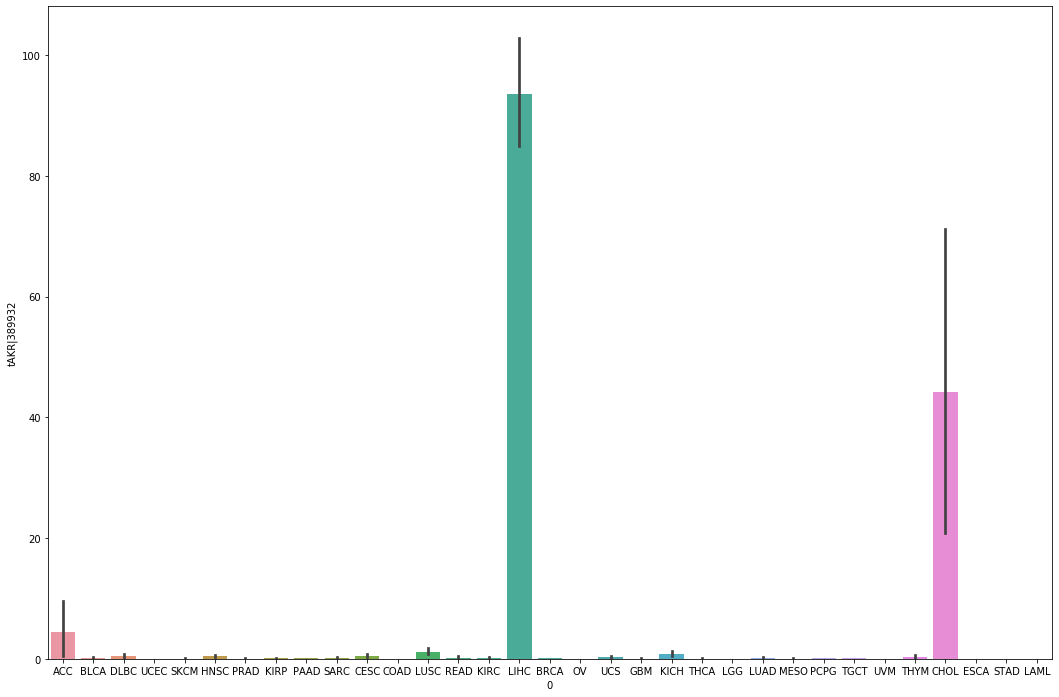

In [ ]:

plt.figure(figsize=(18, 12))
sns.barplot(x=label[0], y=data['tAKR|389932'])

In [ ]:
# set labels as index to the data
data['label'] = label[0]
data = data.set_index("label")

In [ ]:
# get mean expression level for each gene for different cancer class
mean_express_per_class = data.groupby(level=0).mean()

# check the variance in mean expression level over different cancer class
print(mean_express_per_class.var().describe())

# get the genes which has high variance in mean expression level over different cancer class
high_var_cols = [col for col in mean_express_per_class.columns if mean_express_per_class[col].var() > 300000]

# number of gene with high variance
print("Number of high variant genes", len(high_var_cols))

count    2.053100e+04
mean     2.132883e+07
std      1.191069e+09
min      0.000000e+00
25%      2.706258e+03
50%      4.346318e+04
75%      2.992804e+05
max      1.635620e+11
dtype: float64
5122


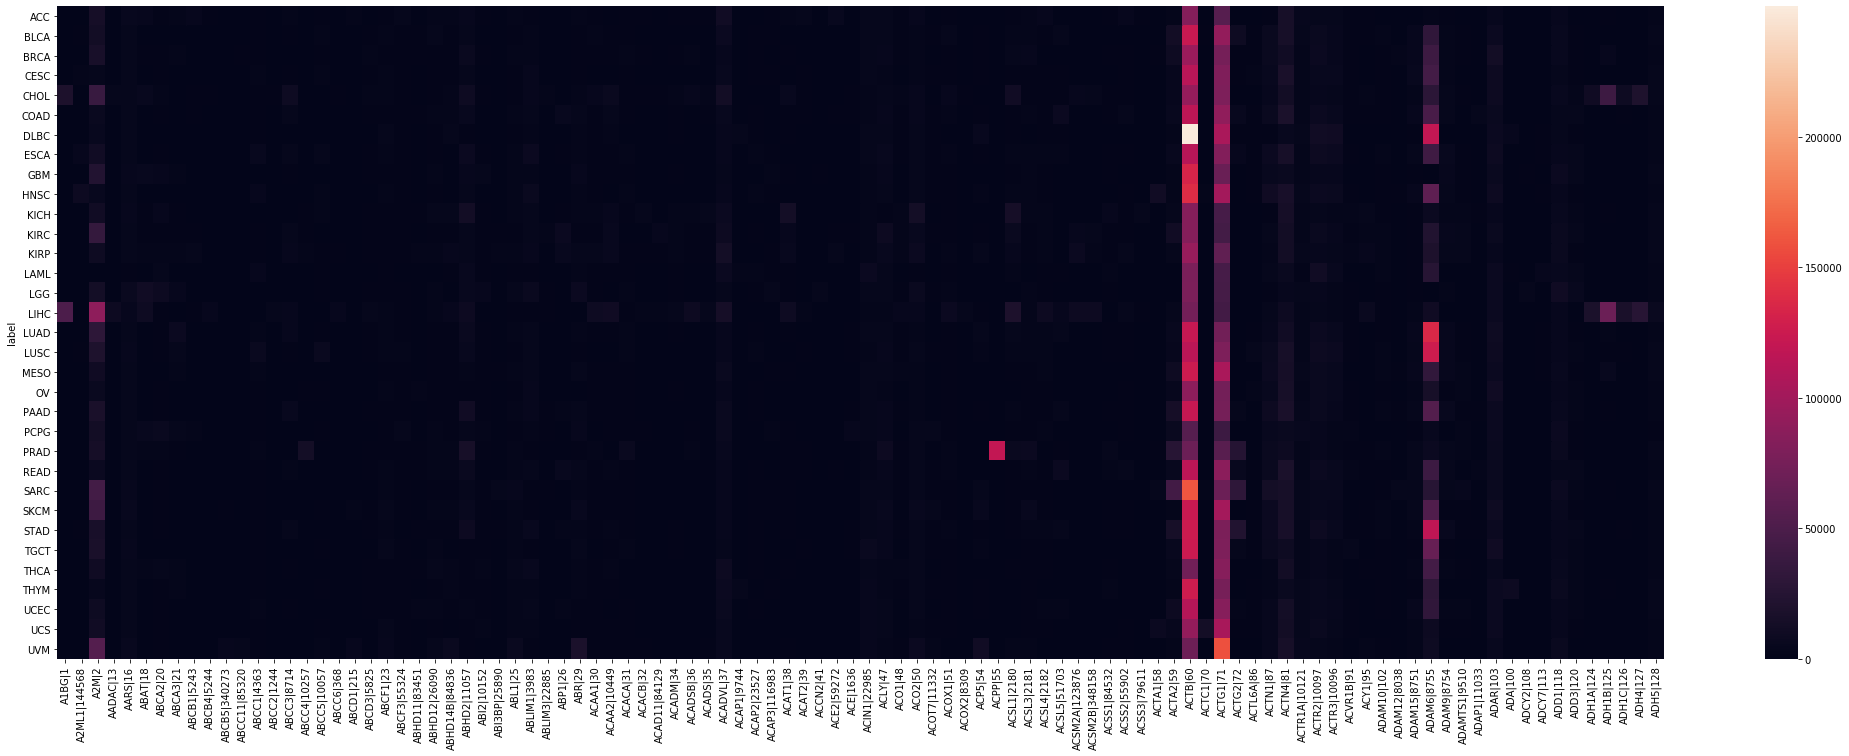

In [ ]:
# select the data for mean gene expresion for high variation genes over diff cancer classes
high_var_genes = mean_express_per_class[high_var_cols]

plt.figure(figsize=(36, 12))
sns.heatmap(data=high_var_genes.iloc[:,:100])